# Import binary data - Taken from binarized dataset


In [20]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
# Load the dataset from csv files
full_dataset = pd.read_csv("../../output_full_web_or_not.csv", header=0, usecols=[*range(1,23)], sep=";") 
full_dataset.dropna(axis = 0, inplace = True)
print("The shape of the full dataset: " + str(full_dataset.shape))

full_dataset.head()

# Set of features in the dataset
features = list(full_dataset.columns)
print("Features: " + str(features[:-1]))

activity_df = full_dataset

The shape of the full dataset: (382, 22)
Features: ['session_time', '%tcp_protocol', '%udp_protocol', 'ul_data_volume', 'max_ul_volume', 'min_ul_volume', 'avg_ul_volume', 'std_ul_volume', '%ul_volume', 'dl_data_volume', 'max_dl_volume', 'min_dl_volume', 'avg_dl_volume', 'std_dl_volume', '%dl_volume', 'nb_uplink_packet', 'nb_downlink_packet', 'ul_packet', 'dl_packet', 'kB/s', 'nb_packet/s']


In [22]:
activity_df = activity_df.sample(frac=1)

In [23]:
y_df = activity_df['output'].to_frame()
X_df = activity_df[activity_df.columns.difference(['output'])]

X_train, X_test, y_train_orig, y_test_orig = train_test_split(X_df, y_df, stratify=y_df, train_size=0.7, random_state=9)

print("Shape of the training dataset: " + str(X_train.shape) + ", " + str(y_train_orig.shape))
print("Shape of the testing dataset: " + str(X_test.shape) + ", " + str(y_test_orig.shape))

# print(X_train.index.tolist())

Shape of the training dataset: (267, 21), (267, 1)
Shape of the testing dataset: (115, 21), (115, 1)


In [24]:
y_train_orig['output'].mask(activity_df['output'] == 1, 0, inplace=True)
y_train_orig['output'].mask(activity_df['output'] == 2, 1, inplace=True)

In [25]:
y_train_orig.value_counts()

output
0         212
1          55
dtype: int64

# Create model

In [26]:
from xgboost import XGBClassifier

clf = XGBClassifier()
print(clf)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 
clf.fit(X_train, y_train_orig)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Shapash

In [27]:
from shapash import SmartExplainer
# features = list(features)
features_dict = dict(zip(features, features))
xpl = SmartExplainer(
    model=clf,
    #preprocessing=encoder, # Optional: compile step can use inverse_transform method
    features_dict=features_dict # optional parameter, specifies label for features name 
)
xpl.compile(x=X_test,
            y_target=y_test_orig # Optional: allows to display True Values vs Predicted Values
           )

In [28]:
xpl.plot.features_importance()

In [29]:
xpl.plot.contribution_plot("%tcp_protocol")

In [30]:
xpl.plot.local_plot(index=5)

In [31]:
X_train[:100].shape

(100, 21)

In [32]:
from shapash.explainer.consistency import Consistency
cns = Consistency()

cns.compile(x=X_train[:100], # Dataset for which we need explanations
            model=clf, # Model to explain
            #preprocessing=encoder, # Optional
            )

 40%|████      | 4/10 [00:02<00:04,  1.40it/s]


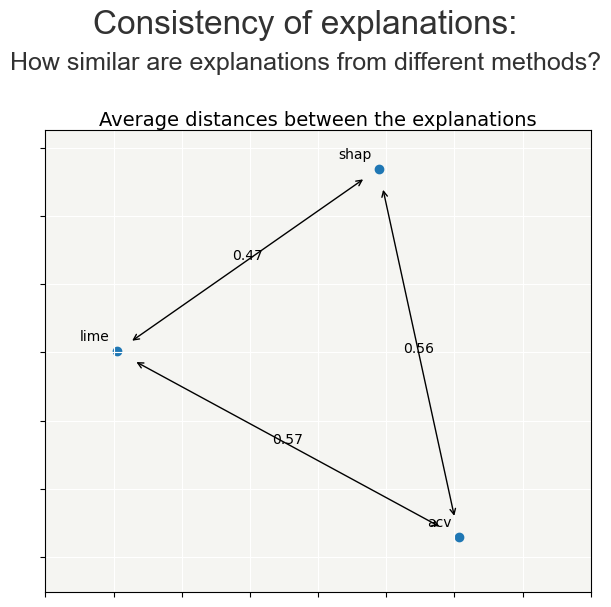

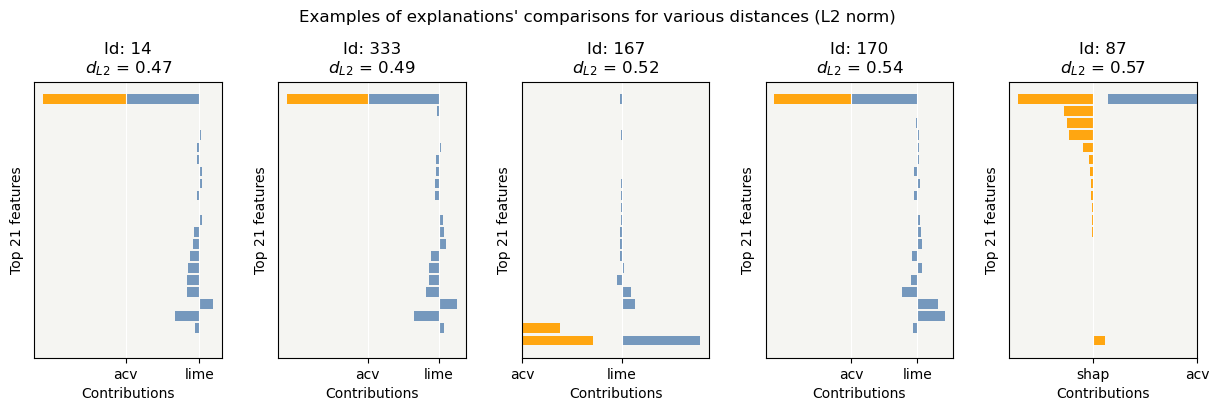

In [35]:
cns.consistency_plot(max_features=21)

In [60]:
cns.index

Int64Index([167, 307, 333, 378,   1, 305,  87, 280, 287,  83, 121, 337,  92,
            220, 104, 246, 321, 326, 317, 273, 327, 145, 353, 258, 334, 103,
            306, 127,  24, 291, 233, 372,  32, 373, 352, 232,  94, 183, 113,
            312, 304,  12, 349, 332, 106, 135,   0, 208, 154, 169, 272, 132,
             52, 268, 209, 322,  20, 324, 370, 155, 228, 340, 299, 308,  36,
            139, 184, 345, 193, 245,  91, 165, 170, 163,  18,  46,  25, 359,
             51,  72,  14, 253, 186, 277, 316, 240, 270, 239,  47,  50,  73,
            124, 380, 187, 250, 138,   4, 112,  23, 384],
           dtype='int64')

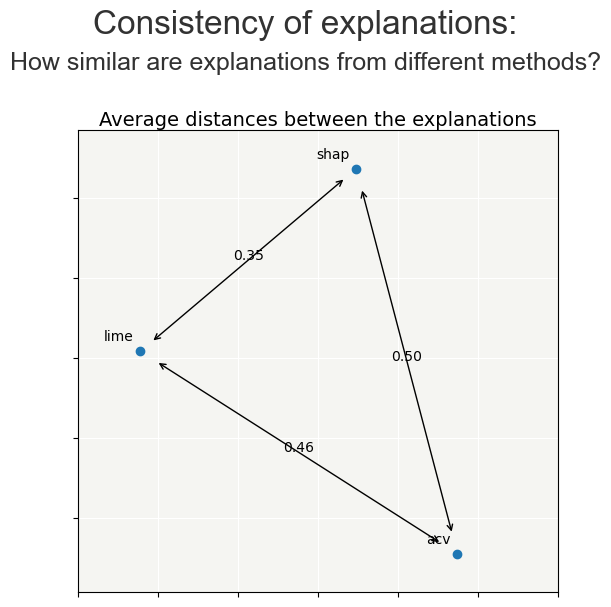

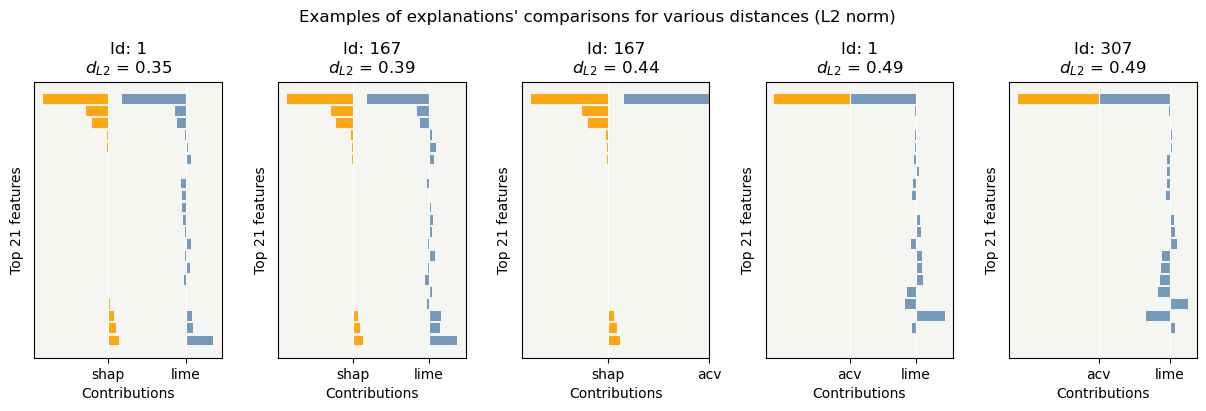

In [37]:
index = [1, 2, 3, 4, 5]
cns.consistency_plot(selection=index, max_features=21)

In [38]:
# xpl.plot.compacity_plot(selection=index, approx=.85, nb_features=3)
xpl.plot.compacity_plot()

In [39]:
xpl.plot.stability_plot()

In [50]:
xpl.plot.stability_plot(selection=[100,9], max_features=5, distribution="boxplot")

In [52]:
xpl.plot.local_neighbors_plot(index=9)

In [ ]:
# import shap

# treeSHAP = shap.TreeExplainer(clf).shap_values(X_train, check_additivity=False)[1]
# samplingSHAP = shap.SamplingExplainer(clf.predict_proba, shap.kmeans(X_train, 200)).shap_values(X_train, check_additivity=False)[1]
# kernelSHAP = shap.KernelExplainer(clf.predict_proba, shap.kmeans(X_train, 200)).shap_values(X_train, check_additivity=False)[1]

# treeSHAP = pd.DataFrame(treeSHAP, columns=X_train.columns)
# samplingSHAP = pd.DataFrame(samplingSHAP, columns=X_train.columns)
# kernelSHAP = pd.DataFrame(kernelSHAP, columns=X_train.columns)

In [ ]:
xpl.generate_report(
    output_file='report.html',
    project_info_file='shapash_project_info.yml',
    x_train=X_train,
    y_train=y_train_orig,
    y_test=y_test_orig,
    title_story="User Network Activities Classification",
    title_description="This document is a data science report of the user network activities classification.",
    metrics=[
        {
            'path': 'sklearn.metrics.mean_squared_error',
            'name': 'Mean squared error',  # Optional : name that will be displayed next to the metric
        },
    ]
)